In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [3]:
sentiments = data['sentiment']
sentiments = sentiments.replace({"positive": 1, "negative": 0})

2.Define a text preprocessing pipeline, i.e., stopword removal, lower casing, punctuation removal etc
1.Define your own train-val-test split. Ratio : (train: 18: test : 5 , val : 2)

In [4]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = text.replace('\d+', '')
    
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

reviews =data['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
X_train, X_test, y_train, y_test = train_test_split(reviews,sentiments,test_size=0.2, random_state=1)
X_train,X_val, y_train, y_val =train_test_split(X_train, y_train,test_size=0.1, random_state=1 )

In [6]:
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)

(10000,)
(36000,)
(4000,)


Developing ML methods:
1. Model a Naive Bayes classifier.
a. Count vectorizer features.
b. TF-IDF features.


In [7]:
vectorizer = CountVectorizer(max_features=10000)
X_train_count = vectorizer.fit_transform(X_train)
clf = MultinomialNB()
clf.fit(X_train_count, y_train)

X_test_count = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_count)
accuracy = accuracy_score(y_test, y_pred)


In [8]:
print(accuracy*100)

85.25


In [9]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

X_test_tfidf = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred)

In [10]:
print(accuracy_tfidf*100)

85.87


3. ii ) Model a decision tree with TF-IDF features

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)
accuracy_dec = accuracy_score(y_test, y_pred)

In [12]:
print(accuracy_dec*100)

71.98


4. Developing Deep neural networks:

    a. RNN model.
    
      1. 64 hidden-vector dimension.


In [13]:
# helps in model building
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.callbacks import EarlyStopping

In [14]:
# helps in text preprocessing
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train)

In [15]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
encoded_val = t.texts_to_sequences(X_val)
print(encoded_train[0:2])

[[1148, 3671, 9852, 849, 1119, 376, 21997, 51, 34614, 1639, 58, 93, 89, 1417, 3587, 536, 1739, 2053, 23070, 1246, 68414, 17410, 1701, 90, 13784, 2988, 1, 21, 42, 63, 4406, 4239, 136, 5, 10514, 52, 86, 70, 21998, 1601, 51, 86, 6, 2, 521, 700, 81, 415, 2325, 921, 3, 158, 921, 104, 511, 13, 13, 45], [14, 255, 4966, 3760, 10326, 345, 42, 99, 1588, 14928, 2471, 40, 496, 38398, 126, 6151, 2374, 162, 155, 1155, 3207, 124, 395, 78, 337, 13161, 5, 39, 1848, 3461, 43767, 22, 1853, 9252, 1, 124, 61, 42, 128, 817, 2149, 187, 719, 468, 151, 145, 44, 419, 54, 817, 416, 42, 735, 7, 3497, 5, 369, 596, 21022, 1015, 51982, 1, 42, 183, 821, 2919, 14, 5, 249, 68415, 1002, 8612, 6208, 54, 817, 2567, 5, 1890, 50, 7968, 250, 4101, 2316, 54, 685, 335, 12584, 1, 1716, 99, 1525, 1616, 409, 70, 118, 108, 1442, 266, 187, 12306, 6387, 77, 127, 8494, 2283, 298, 2132, 12306, 37, 1566, 5268, 43768, 304, 68416, 4223, 817, 1008, 1222, 1027, 97, 15, 1483, 56, 94, 176, 409, 1303, 42, 12584, 1, 11, 441, 354, 47, 5311, 104

In [25]:
max_length = 64
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_val = pad_sequences(encoded_val, maxlen=max_length, padding='post')
print(padded_train)

[[  1148   3671   9852 ...      0      0      0]
 [    97     15   1483 ...     42     54    809]
 [ 43769   7556    490 ...    258     47  68421]
 ...
 [    47   3480      4 ...   1285   1347   2052]
 [  3017   3017 139062 ...   8505  20062    503]
 [   110   1339   5355 ...      0      0      0]]


In [26]:
#max_length = X_train_tfidf.shape[1] #8
#vocab_size = len(vectorizer.get_feature_names_out())
vocab_size = len(t.word_index) + 1
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 64, 128)           17800064  
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,833,089
Trainable params: 17,833,089
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_val, y_val), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/100
1125/1125 [==============================] - 186s 165ms/step - loss: 0.5360 - accuracy: 0.7150 - val_loss: 0.4047 - val_accuracy: 0.8370
Epoch 2/100
1125/1125 [==============================] - 165s 147ms/step - loss: 0.3677 - accuracy: 0.8515 - val_loss: 0.3799 - val_accuracy: 0.8430
Epoch 3/100
1125/1125 [==============================] - 185s 164ms/step - loss: 0.3098 - accuracy: 0.8806 - val_loss: 0.3800 - val_accuracy: 0.8525
Epoch 4/100
1125/1125 [==============================] - 153s 136ms/step - loss: 0.2585 - accuracy: 0.9037 - val_loss: 0.4069 - val_accuracy: 0.8133
Epoch 5/100
1125/1125 [==============================] - 195s 174ms/step - loss: 0.2191 - accuracy: 0.9218 - val_loss: 0.3772 - val_accuracy: 0.8572
Epoch 6/100
1125/1125 [==============================] - 207s 184ms/step - loss: 0.1878 - accuracy: 0.9358 - val_loss: 0.3929 - val_accuracy: 0.8568
Epoch 7/100
1125/1125 [==============================] - 177s 157ms/step - loss: 0.1593 - accuracy: 0.9457

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [30]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

313/313 [==============================] - 2s 5ms/step


In [31]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5044
           1       0.83      0.83      0.83      4956

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Accuracy : 0.8268


0.8268

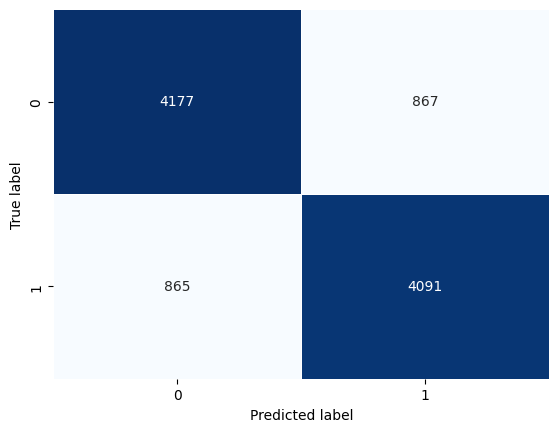

In [32]:
plot_confusion_matrix(y_test, preds)